# Elastica Examples

This notebook contains examples and visualizations of the elastica functions implemented in the `elastica-py` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add parent directory to path
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.elastica import elastica_in_TI
from src.visualization.plotting import plot_curves
from src.utils.curvature import find_curvature_from_points
from src.utils.interpolation import poly_interpolation
from src.visualization.drawing import build_circle, draw_left_inducer, draw_right_inducer


## Example 1: Elastica in Tangent Bundle

This example demonstrates how to compute the elastica in the tangent bundle for a given set of parameters.

Elastica in TI: err:0.000428 c:-0.000015 phi:0.000098 g0:0.000103 l=2.721801


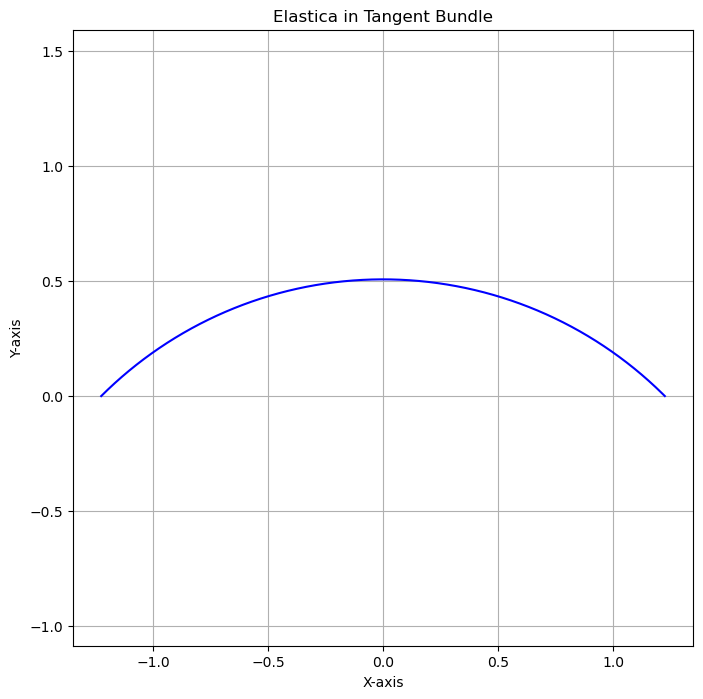

In [2]:
# Parameters
dx = 1.2247
R = np.sqrt(3)

# Compute elastica
[tl, x, y, theta, dtheta, ddtheta, err] = elastica_in_TI(-dx, 0, 45, -1/R, dx, 0, -45, -1/R, 0.001, [0, 0, 0, np.sqrt(3)*np.pi/2], 1)

# Plot the results
plt.figure(figsize=(8, 8))
plot_curves(x, y, color='b')


## Example 2: Drawing Inducers

This example shows how to draw left and right inducers using the provided functions.

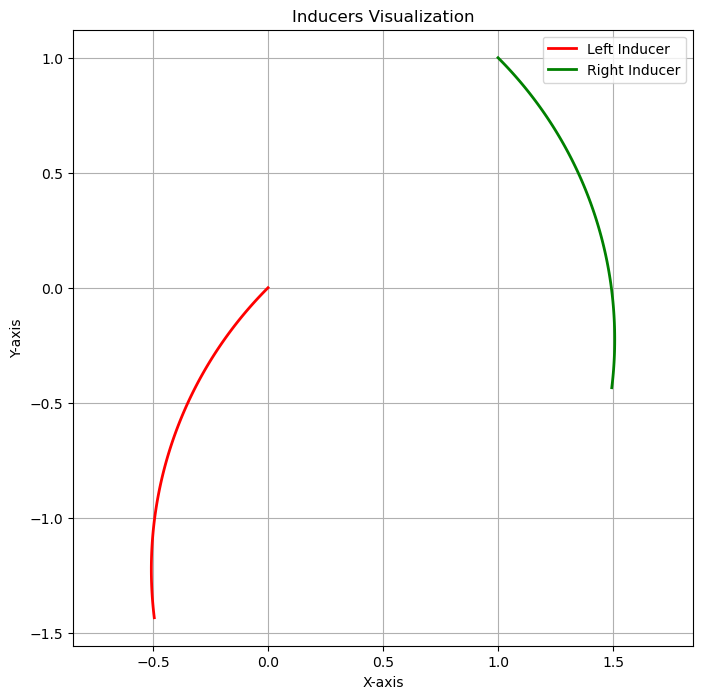

In [3]:
# Parameters for the inducers
L = [0, 0, 45, -1/np.sqrt(3)]  # Left inducer parameters
R = [1, 1, -45, -1/np.sqrt(3)]  # Right inducer parameters
arc_perimeter = np.pi / 2  # Example arc perimeter

# Draw inducers
plt.figure(figsize=(8, 8))
M_left = draw_left_inducer(L[0], L[1], L[2], L[3], arc_perimeter)
M_right = draw_right_inducer(R[0], R[1], R[2], R[3], arc_perimeter)
plt.plot(M_left.real, M_left.imag, 'r', linewidth=2, label='Left Inducer')
plt.plot(M_right.real, M_right.imag, 'g', linewidth=2, label='Right Inducer')
plt.title('Inducers Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## Example 3: Curvature Calculation

This example demonstrates how to calculate curvature from three points.

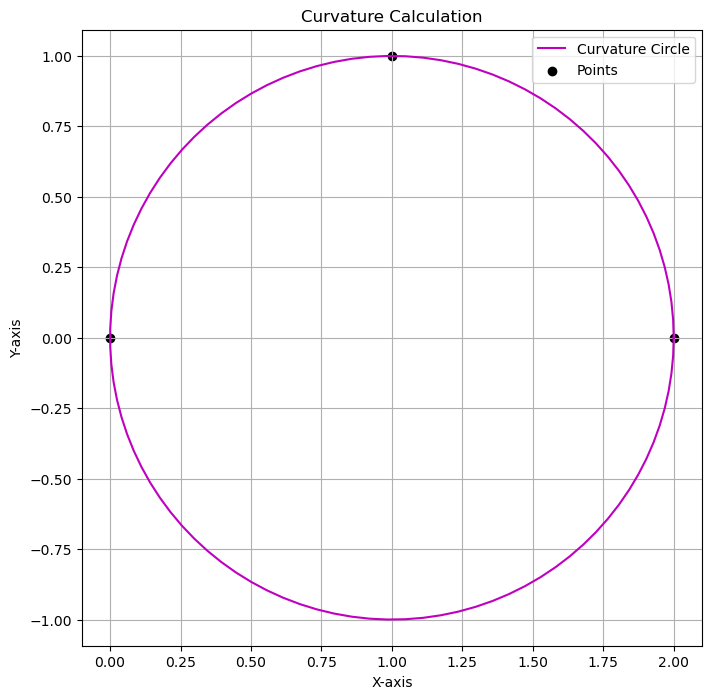

In [4]:
# Points for curvature calculation
x0, y0 = 0, 0
x1, y1 = 1, 1
x2, y2 = 2, 0

# Calculate curvature
[kappa, theta, circ] = find_curvature_from_points(x0, y0, x1, y1, x2, y2)

# Plot the curvature
plt.figure(figsize=(8, 8))
plt.plot(circ.real, circ.imag, 'm', label='Curvature Circle')
plt.scatter([x0, x1, x2], [y0, y1, y2], color='black', label='Points')
plt.title('Curvature Calculation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()